In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import functions 
import yfinance as yf
import scipy.stats as st

In [2]:
data = functions.downloadData(["BLKDINM0-A.MX", "BLKCORM0-D.MX", "GOLD5+B2-C.MX", "BLKINT1B1-D.MX", "BLKUSEQC0-C.MX"])

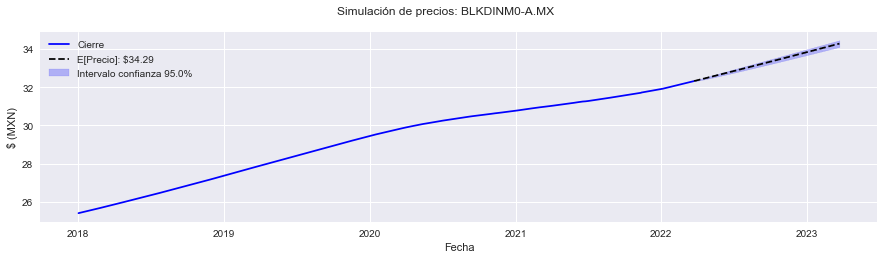

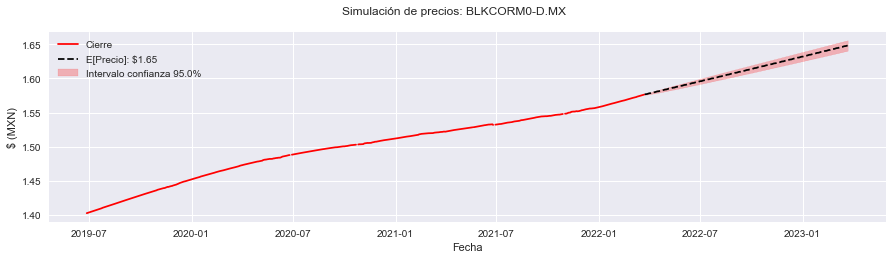

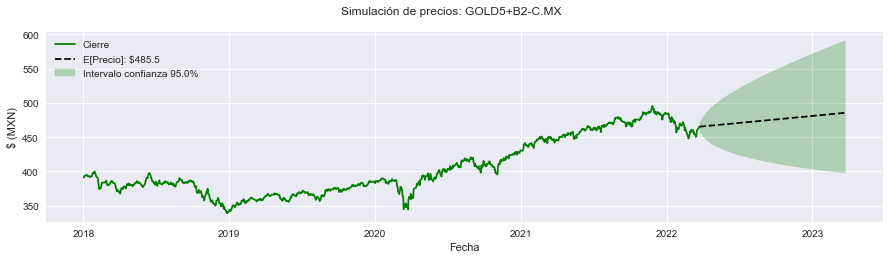

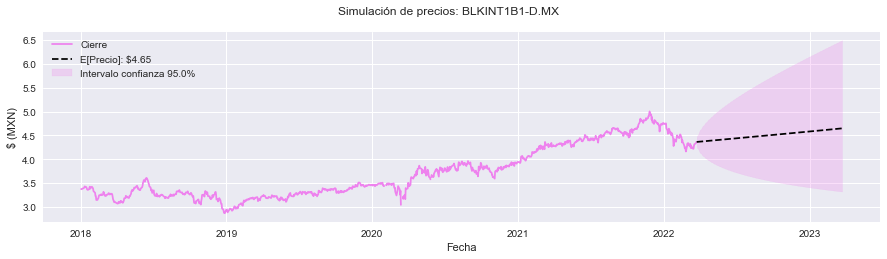

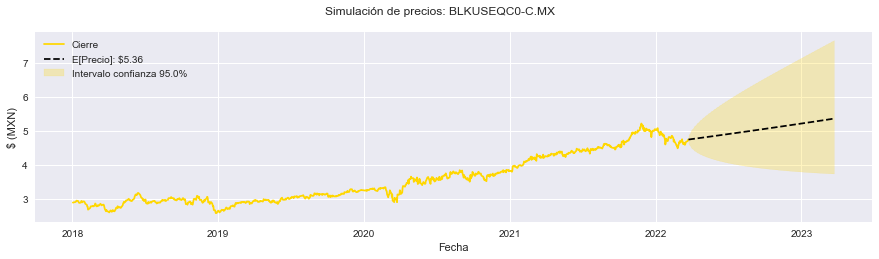

In [4]:
def brownianMotion(historicPrices : "DataFrame con los precios históricos de los ETF's",
                significanceLevel : "Nivel de significancia %", colors : "colores"):

    for i in range(len(historicPrices.iloc[0])):
        plt.style.use('seaborn')
        
        # Parámetros históricos
        returns = historicPrices.iloc[:, i].dropna().pct_change().dropna()
        mu, sigma = np.mean(returns), np.std(returns)
    
        # Simulación de precios
        idx = pd.bdate_range(returns.index[-1] + dt.timedelta(1), end = returns.index[-1] + dt.timedelta(365))
        d_t = np.arange(1, len(idx) + 1)
        expectedPrice = pd.Series(data.iloc[-1, i] * np.exp((mu - (sigma ** 2) / 2) * d_t), idx)
        
        # Intervalos de confianza
        Z = st.norm.ppf(1 - significanceLevel / 2)
        infLim = pd.Series(np.exp(np.log(data.iloc[-1, i]) + (mu - (sigma ** 2) / 2) * d_t - Z * (sigma * np.sqrt(d_t))), idx)
        supLim = pd.Series(np.exp(np.log(data.iloc[-1, i]) + (mu - (sigma ** 2) / 2) * d_t + Z * (sigma * np.sqrt(d_t))), idx)
        
        # Visualización
        fig, axes = plt.subplots(1, 1, figsize = (15, 3.5))
        fig.suptitle("Simulación de precios: " + historicPrices.columns[i])
        
        axes.plot(data.iloc[:, i], color = colors[i], label = "Cierre")
        axes.plot(expectedPrice, "--", color = "k", label = "E[Precio]: $" + str(round(expectedPrice[-1], 2)))
        axes.fill_between(expectedPrice.index, infLim, supLim, color = colors[i], alpha = 0.25, 
                          label = "Intervalo confianza " + str(100 - significanceLevel * 100) + "%")
        axes.legend(loc = "upper left")
        axes.set_xlabel("Fecha")
        axes.set_ylabel("$ (MXN)")

brownianMotion(data, 0.05, ["blue", "red", "green", "violet", "gold"])    

In [8]:
returns = data.iloc[:, 4].pct_change().dropna()
mu, sigma = np.mean(returns), np.std(returns)
idx = pd.bdate_range(returns.index[-1] + dt.timedelta(1), end = returns.index[-1] + dt.timedelta(365))

dt = np.arange(1, len(idx) + 1)
expectedPrice = pd.Series(data.iloc[-1, 4] * np.exp((mu - (sigma ** 2) / 2) * dt), idx)

Z = st.norm.ppf(1 - .05 / 2)
infLim = pd.Series(np.exp(np.log(data.iloc[-1, 4]) + (mu - (sigma ** 2) / 2) * dt - Z * (sigma * np.sqrt(dt))), idx)
supLim = pd.Series(np.exp(np.log(data.iloc[-1, 4]) + (mu - (sigma ** 2) / 2) * dt + Z * (sigma * np.sqrt(dt))), idx)

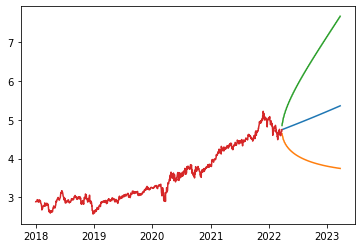

In [9]:
plt.plot(expectedPrice)
plt.plot(infLim)
plt.plot(supLim)
plt.plot(data.iloc[:, 4])

In [10]:
expectedPrice

2022-03-24    4.744798
2022-03-25    4.747017
2022-03-28    4.749237
2022-03-29    4.751458
2022-03-30    4.753681
                ...   
2023-03-17    5.348147
2023-03-20    5.350648
2023-03-21    5.353150
2023-03-22    5.355654
2023-03-23    5.358159
Freq: B, Length: 261, dtype: float64